In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
header_names = ['id','name','symbol','slug','num_market_pairs','date added','max_supply','circulating_supply','total_supply','platform_id','platform_name','platform_symbol','platform_slug','platform_token','cmc_rank','last_updated','price','volume_24h','percent_change_1h','percent_change_24h','percent_change_7d','percent_change_30d','percent_change_60d','percent_change_90d','market_cap','extracted_time','count']
my_data = pd.read_csv('all_crypto_half_hour.csv',names=header_names)
my_data = pd.DataFrame(my_data)
print(len(my_data))
print(my_data.isnull().sum()/len(my_data))

147500
id                    0.000000
name                  0.000000
symbol                0.000000
slug                  0.000000
num_market_pairs      0.000000
date added            0.000000
max_supply            0.399044
circulating_supply    0.000000
total_supply          0.000000
platform_id           0.541098
platform_name         0.541098
platform_symbol       0.541098
platform_slug         0.541098
platform_token        0.541098
cmc_rank              0.000000
last_updated          0.000000
price                 0.000000
volume_24h            0.000000
percent_change_1h     0.000000
percent_change_24h    0.000000
percent_change_7d     0.000000
percent_change_30d    0.001600
percent_change_60d    0.003661
percent_change_90d    0.009234
market_cap            0.000000
extracted_time        0.000000
count                 0.000000
dtype: float64


In [2]:
my_data.percent_change_30d.fillna(my_data.percent_change_30d.mean, inplace=True)
my_data.percent_change_60d.fillna(my_data.percent_change_60d.mean, inplace=True)
my_data.percent_change_90d.fillna(my_data.percent_change_90d.mean, inplace=True)

name                  0
symbol                0
num_market_pairs      0
circulating_supply    0
total_supply          0
cmc_rank              0
last_updated          0
price                 0
volume_24h            0
percent_change_1h     0
percent_change_24h    0
percent_change_7d     0
percent_change_30d    0
percent_change_60d    0
percent_change_90d    0
market_cap            0
dtype: int64
146133


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit(my_data.name)
my_data.name = labelencoder.transform(my_data.name)
new_data = my_data['name']
new_data = pd.concat(new_data,my_data.percent_change_90d)
new_data = pd.concat(new_data,my_data.percent_change_60d)
new_data = pd.concat(new_data,my_data.percent_change_30d)
new_data = pd.concat(new_data,my_data.percent_change_7d)
X_data = new_data.drop(['name'],axis=1)
Y_data = new_data.name

In [3]:
#convert time string to time object
modified_data['converted time'] = pd.to_datetime(modified_data['last_updated'])
modified_data['converted time'] = [d.date() for d in modified_data['converted time']]

                name symbol  num_market_pairs  circulating_supply  \
0            Bitcoin    BTC              9873        1.865743e+07   
1           Ethereum    ETH              6233        1.151035e+08   
2            Cardano    ADA               259        3.194831e+10   
3       Binance Coin    BNB               601        1.545328e+08   
4             Tether   USDT             11498        3.886893e+10   
...              ...    ...               ...                 ...   
147495     SwissBorg   CHSB                 7        1.000000e+09   
147496          ICON    ICX                66        6.280304e+08   
147497          Ankr   ANKR                62        6.996233e+09   
147498          HUSD   HUSD                81        7.852567e+08   
147499     Ravencoin    RVN                81        8.910955e+09   

        total_supply  cmc_rank              last_updated         price  \
0       1.865743e+07         1  2021-03-18T19:56:04.000Z  41396.411103   
1       1.151035e+08   

In [4]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, normalize, Normalizer
df = pd.DataFrame(modified_data)
btc = df[df.isin(['BTC']).any(axis=1)]
btc['name'] = preprocessing.LabelEncoder().fit_transform(btc.name)
btc['symbol'] = preprocessing.LabelEncoder().fit_transform(btc.symbol)
btc_values = btc.drop(['last_updated','name','symbol','converted time','cmc_rank'],axis=1)
pd.set_option('display.precision',2)
btc_values.corr()
#btc.hist()

C:\Users\braim\AppData\Local\Temp\ipykernel_13368\2989957828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['name'] = preprocessing.LabelEncoder().fit_transform(btc.name)
C:\Users\braim\AppData\Local\Temp\ipykernel_13368\2989957828.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['symbol'] = preprocessing.LabelEncoder().fit_transform(btc.symbol)


,num_market_pairs,circulating_supply,total_supply,price,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap
num_market_pairs,1.00,-0.36,-0.36,-0.08,-0.20,-0.08,-0.11,-0.10,-0.04,0.17,0.46,-0.08
circulating_supply,-0.36,1.00,1.00,-0.58,0.27,0.04,-0.11,-0.24,-0.79,-0.95,-0.91,-0.58
total_supply,-0.36,1.00,1.00,-0.58,0.27,0.04,-0.11,-0.24,-0.79,-0.95,-0.91,-0.58
price,-0.08,-0.58,-0.58,1.00,-0.28,0.04,0.32,0.70,0.78,0.63,0.58,1.00
volume_24h,-0.20,0.27,0.27,-0.28,1.00,0.07,-0.39,-0.44,-0.25,-0.29,-0.36,-0.28
percent_change_1h,-0.08,0.04,0.04,0.04,0.07,1.00,0.23,0.08,0.03,-0.01,-0.03,0.04
percent_change_24h,-0.11,-0.11,-0.11,0.32,-0.39,0.23,1.00,0.46,0.28,0.16,0.16,0.32
percent_change_7d,-0.10,-0.24,-0.24,0.70,-0.44,0.08,0.46,1.00,0.52,0.37,0.36,0.70
percent_change_30d,-0.04,-0.79,-0.79,0.78,-0.25,0.03,0.28,0.52,1.00,0.85,0.71,0.78
percent_change_60d,0.17,-0.95,-0.95,0.63,-0.29,-0.01,0.16,0.37,0.85,1.00,0.87,0.63


In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(btc.drop(['last_updated','converted time'],axis=1))
#normalizer = Normalizer(norm='l1').fit(btc.drop(['last_updated','converted time'],axis=1))
#normalized_data = normalizer.transform(btc.drop(['last_updated','converted time'],axis=1))
print(scaled_data[:20])

[[0.         0.         0.91555556 0.         0.         0.
  0.75882149 0.25633845 0.48894169 0.618181   0.68966382 0.77048558
  0.7739273  0.97588228 0.75604615]
 [0.         0.         0.91555556 0.00146735 0.00146735 0.
  0.76618111 0.26071315 0.56124052 0.60633989 0.70600685 0.78221302
  0.77559221 0.98908716 0.76341811]
 [0.         0.         0.91555556 0.00146735 0.00146735 0.
  0.76862736 0.26074655 0.58174411 0.60511114 0.70746899 0.78490584
  0.77752692 0.99056974 0.76586531]
 [0.         0.         0.91555556 0.00146735 0.00146735 0.
  0.76862736 0.26074655 0.58174411 0.60511114 0.70746899 0.78490584
  0.77752692 0.99056974 0.76586531]
 [0.         0.         0.91555556 0.00146735 0.00146735 0.
  0.76230834 0.25950001 0.58192719 0.60094479 0.69992287 0.77559933
  0.77574269 0.98462502 0.75954385]
 [0.         0.         0.91555556 0.00146735 0.00146735 0.
  0.77212241 0.25810666 0.63052955 0.60999768 0.71826624 0.7913998
  0.78548091 0.98801691 0.76936169]
 [0.         0.  

0         2021-03-18
100       2021-03-18
200       2021-03-18
300       2021-03-18
400       2021-03-18
             ...    
147000    2021-05-30
147100    2021-05-30
147200    2021-06-03
147300    2021-06-03
147400    2021-06-03
Name: converted time, Length: 1475, dtype: object


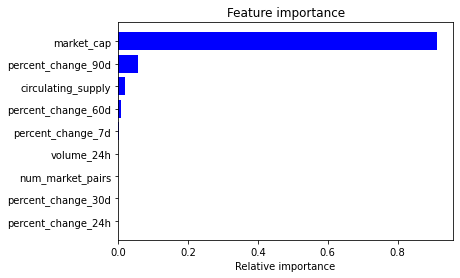

In [9]:
from sklearn.ensemble import RandomForestRegressor as rc
rf_model = rc(random_state=1,max_depth=4)
print(btc['converted time'])
X_data = btc.drop(['price','converted time','last_updated','total_supply'],axis=1)
rf_model.fit(X_data,btc.price)
train_features = X_data.columns
importance = rf_model.feature_importances_
indices = np.argsort(importance)[-9:]
plt.title('Feature importance')
plt.barh(range(len(indices)),importance[indices],color='b',align='center')
plt.yticks(range(len(indices)),[train_features[i] for i in indices])
plt.xlabel('Relative importance')
pd.DataFrame.to_csv(btc,'your_btc_data.csv')
plt.show()